In [416]:
import pandas as pd
import os

In [417]:
cwd = os.path.abspath('')
data_raw = pd.read_csv(fr'{cwd}\data\behaviour\behaviour.csv')

In [418]:
data_raw

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [419]:
data_raw.rename(columns={'Personality': 'class'}, inplace=True)

In [420]:
data_raw.dropna(inplace=True)

In [421]:
data_raw

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,class
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


In [422]:
data = data_raw

In [423]:
len(data)

2477

In [424]:
data.duplicated().any()

True

In [425]:
data.drop_duplicates(inplace=True)

In [426]:
len(data)

2098

In [427]:
conditional_df = data.drop(columns=['class'])
conditional_df.duplicated().any()

True

In [428]:
for val, group in data.groupby(list(conditional_df.columns)):
    decisions = set(group['class'].values)
    if len(decisions) == 1:
        pass
    else:
        most_common_decision = None
        occurences = 0
        for decision in decisions:
            occ = len(group[group['class'] == decision])
            if occ > occurences:
                occurences = occ
                most_common_decision = decision
        data.loc[group.index, 'class'] = most_common_decision

In [429]:
data.drop_duplicates(inplace=True)

In [430]:
data.drop(columns=['class']).duplicated().any()

False

In [431]:
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,class
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2888,5.0,Yes,0.0,1.0,Yes,1.0,0.0,Introvert
2889,6.0,Yes,0.0,0.0,Yes,3.0,0.0,Introvert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


In [432]:
# for col in data.columns:
#     if col in ['class', 'Stage_fear', 'Drained_after_socializing']:
#         continue
#     print(col)
#     print(set(sorted(data[col])))
#     if col in ['Time_spent_Alone', 'Social_event_attendance', 'Post_frequency', 'Friends_circle_size']:
#         bins = 15
#     elif col in ['Going_outside']:
#         bins = 7
#     data[col] = pd.cut(data[col], bins=bins)

In [433]:
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,class
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2888,5.0,Yes,0.0,1.0,Yes,1.0,0.0,Introvert
2889,6.0,Yes,0.0,0.0,Yes,3.0,0.0,Introvert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


([<matplotlib.patches.Wedge at 0x1779e5e14f0>,
 [Text(-0.2063857147003206, 1.0804651483354926, 'Extrovert - 1142 instances'),
  Text(0.20638561353987167, -1.0804651676587131, 'Introvert - 897 instances')])

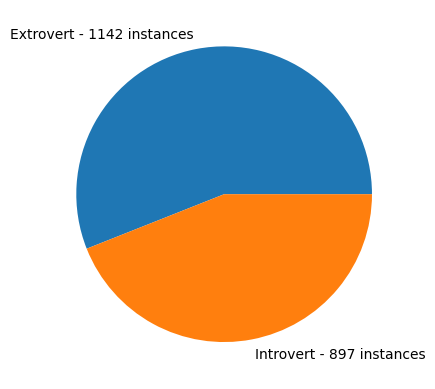

In [434]:
import matplotlib.pyplot as plt
counted = data_raw['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


In [435]:
data.duplicated().any()

False

In [436]:
data.drop_duplicates(inplace=True)

In [437]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
conditional_columns = [col for col in data.columns if col != 'class']
one_hot_encoded = encoder.fit_transform(data[conditional_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                            columns=encoder.get_feature_names_out(conditional_columns), 
                            index=data.index)
data_encoded = pd.concat([data.drop(conditional_columns, axis=1), one_hot_df], axis=1)

In [438]:
data_encoded

,class,Time_spent_Alone_0.0,Time_spent_Alone_1.0,Time_spent_Alone_2.0,Time_spent_Alone_3.0,Time_spent_Alone_4.0,Time_spent_Alone_5.0,Time_spent_Alone_6.0,Time_spent_Alone_7.0,Time_spent_Alone_8.0,...,Post_frequency_1.0,Post_frequency_2.0,Post_frequency_3.0,Post_frequency_4.0,Post_frequency_5.0,Post_frequency_6.0,Post_frequency_7.0,Post_frequency_8.0,Post_frequency_9.0,Post_frequency_10.0
0,Extrovert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Extrovert,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,Introvert,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2889,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2896,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2897,Introvert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [439]:
data_encoded.drop(columns=['class']).duplicated().any()

False

In [440]:
data_encoded.duplicated().any()

False

In [441]:
data_encoded.drop_duplicates(inplace=True)

In [442]:
data_encoded.duplicated().any()

False

In [443]:
data_encoded.drop(columns=['class']).duplicated().any()

False

In [444]:
conditional_df = data_encoded.drop(columns=['class'])
conditional_df.duplicated().any()
data = data_encoded

In [445]:
for val, group in data.groupby(list(conditional_df.columns)):
    decisions = set(group['class'].values)
    if len(decisions) == 1:
        pass
    else:
        most_common_decision = None
        occurences = 0
        for decision in decisions:
            occ = len(group[group['class'] == decision])
            if occ > occurences:
                occurences = occ
                most_common_decision = decision
        data.loc[group.index, 'class'] = most_common_decision

In [446]:
data.duplicated().any()

False

In [447]:
data.drop_duplicates(inplace=True)

In [448]:
data.duplicated().any()

False

In [449]:
data_encoded.drop(columns=['class']).duplicated().any()

False

In [450]:
data_encoded

,class,Time_spent_Alone_0.0,Time_spent_Alone_1.0,Time_spent_Alone_2.0,Time_spent_Alone_3.0,Time_spent_Alone_4.0,Time_spent_Alone_5.0,Time_spent_Alone_6.0,Time_spent_Alone_7.0,Time_spent_Alone_8.0,...,Post_frequency_1.0,Post_frequency_2.0,Post_frequency_3.0,Post_frequency_4.0,Post_frequency_5.0,Post_frequency_6.0,Post_frequency_7.0,Post_frequency_8.0,Post_frequency_9.0,Post_frequency_10.0
0,Extrovert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Extrovert,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,Introvert,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2889,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2896,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2897,Introvert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


([<matplotlib.patches.Wedge at 0x1779e671520>,
 [Text(-0.2063857147003206, 1.0804651483354926, 'Extrovert - 1142 instances'),
  Text(0.20638561353987167, -1.0804651676587131, 'Introvert - 897 instances')])

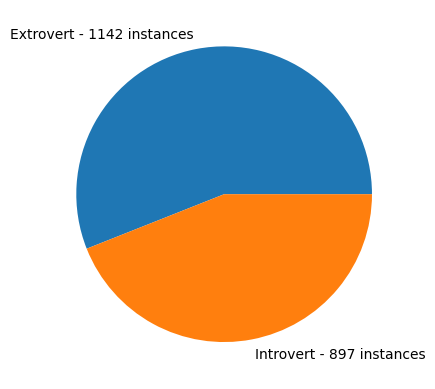

In [451]:
import matplotlib.pyplot as plt
counted = data['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


In [452]:
data_encoded.to_csv(fr'{cwd}\data\behaviour\behaviour_preprocessed.csv', index=False)

In [453]:
data_encoded

,class,Time_spent_Alone_0.0,Time_spent_Alone_1.0,Time_spent_Alone_2.0,Time_spent_Alone_3.0,Time_spent_Alone_4.0,Time_spent_Alone_5.0,Time_spent_Alone_6.0,Time_spent_Alone_7.0,Time_spent_Alone_8.0,...,Post_frequency_1.0,Post_frequency_2.0,Post_frequency_3.0,Post_frequency_4.0,Post_frequency_5.0,Post_frequency_6.0,Post_frequency_7.0,Post_frequency_8.0,Post_frequency_9.0,Post_frequency_10.0
0,Extrovert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Extrovert,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,Introvert,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2889,Introvert,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2896,Extrovert,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2897,Introvert,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
